In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
!pip install -U scikit-learn


## embedding visualization 

### using PCA reduce the dimention directly

In [100]:
# Load the data

data = pd.read_excel('/Users/macbook/Desktop/pages_data.xlsx', sheet_name="Sheet1")
input_data = pd.read_excel('/Users/macbook/Desktop/pages_data.xlsx', sheet_name="Sheet2")


PC_embedding = data[['Title', 'embedding_c']]
#Summary_embedding = data[['Title', 'embedding_s']]


In [52]:
len(data)

9

In [53]:
embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input = input_data['Embedding'].values
input_array = [np.array(eval(vector)) for vector in input]
task_topics = input_data['task topic'].values

print(len(PC_arrays))
print(len(input_array))

9
2


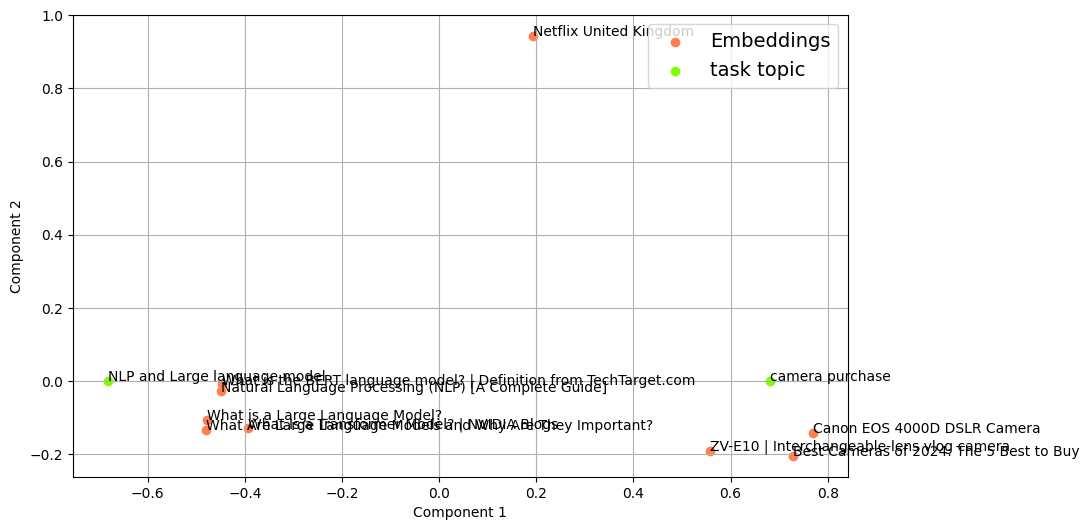

In [66]:
embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input = input_data['Embedding'].values
input_array = [np.array(eval(vector)) for vector in input]
task_topics = input_data['task topic'].values

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(PC_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='coral', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='chartreuse', label='task topic')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):

    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))
plt.rcParams.update({'font.size': 14})

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

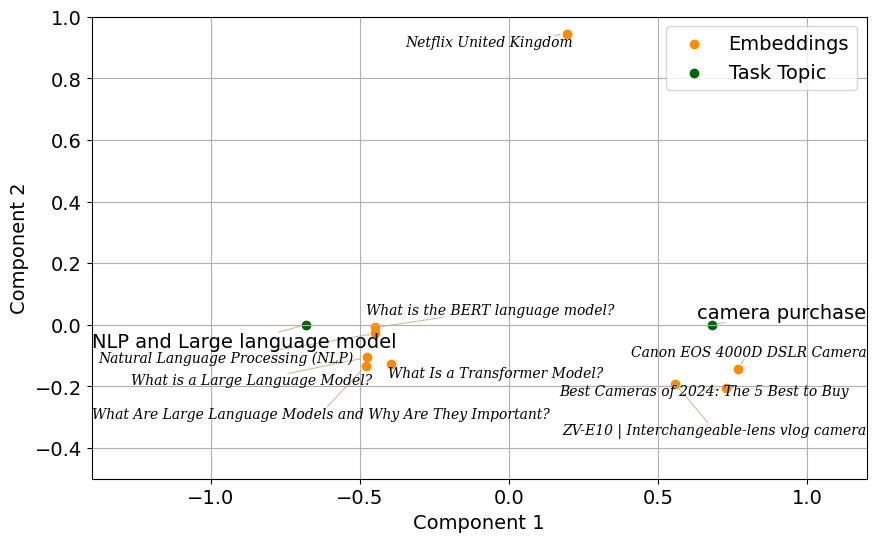

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text  # Import the library

# Assuming PC_embedding and input_data are predefined DataFrames

# Prepare data
embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input_array = [np.array(eval(vector)) for vector in input_data['Embedding'].values]
task_topics = input_data['task topic'].values

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(PC_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='darkorange', label='Embeddings')

# Annotations for embeddings
texts = []
for i, title in enumerate(titles):
    texts.append(plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], title, ha='right', va='top',fontsize=10, fontstyle='italic', family='serif'))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='darkgreen', label='Task Topic')

# Annotations for task topics
for i, topic in enumerate(task_topics):
    texts.append(plt.text(reduced_input[i, 0], reduced_input[i, 1], topic, ha='right', va='top'))

# Customize plot aesthetics
plt.rcParams.update({'font.size': 14})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)

plt.ylim(-0.5, 1)  # Limit the y-axis to better visualize the data
plt.xlim(-1.4,1.2)
# Use adjust_text to optimize text placement
adjust_text(texts, 
            arrowprops=dict(arrowstyle="->", color='tan', lw=0.7, shrinkA=0, shrinkB=4))


plt.show()



/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from c

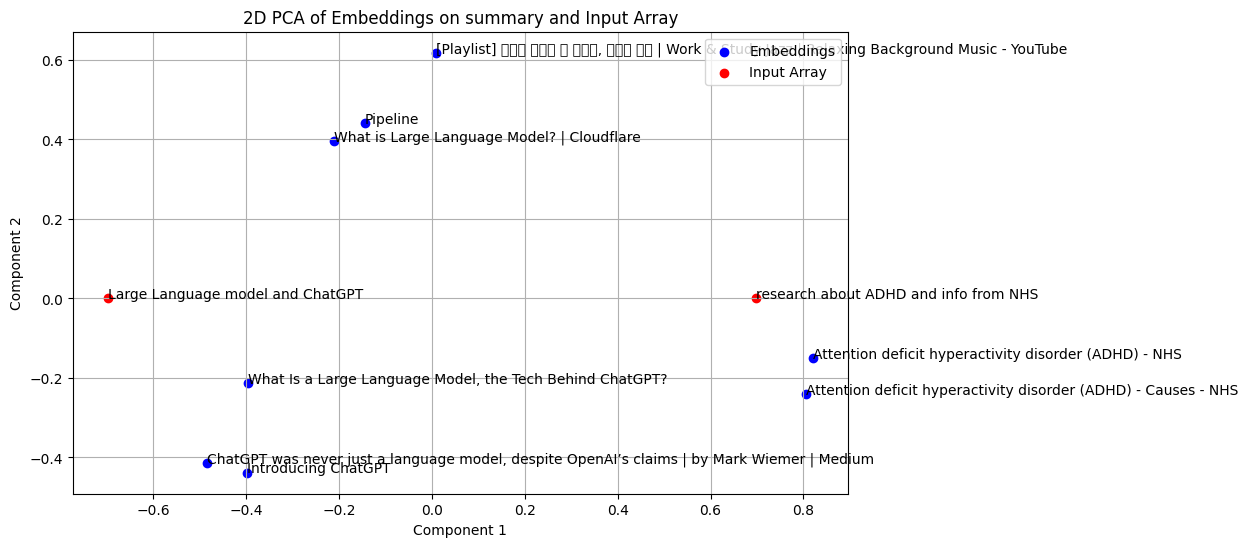

In [78]:
embeddings_s = Summary_embedding['embedding_s'].values
Summary_arrays= [np.array(eval(vector)) for vector in embeddings_s]

titles = PC_embedding['Title'].values


# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(Summary_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='b', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='r', label='Input Array')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):
    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Embeddings on summary and Input Array')
plt.legend()
plt.grid(True)
plt.show()



### reduce the dimension using t-sne

In [6]:
array_2d = [[-0.05556300721513484, -0.6769316576671516],
            [-0.3753715761660077, -0.03561942318800707],
            [1.1948996805500638, 0.7092152670507257],
            [-1.6998416048714686, -0.529111015226007],
            [-1.3240593616185383, 1.005654197520031],
            [-0.5841691742593845, 0.6875212559804453],
            [-0.41156010862035464, -0.5131336792342488],
            [1.8332065746161632, -0.6884045096268143]]

topic_2d = [[1.4224585775846614, 0.040809564391026815]]

title = ['[Playlist] 오롯이 혼자인 방 안에서, 그리고 재즈 | Work & Study Jazz | Relaxing Background Music - YouTube',
         'Attention deficit hyperactivity disorder (ADHD) - Causes - NHS',
         'Introducing ChatGPT',
         'Attention deficit hyperactivity disorder (ADHD) - NHS',
         'What is a large language model (LLM)? | Cloudflare',
         'pipelines',
         'ChatGPT was never just a language model, despite OpenAI’s claims | by Mark Wiemer | Medium',
         'What Is a Large Language Model, the Tech Behind ChatGPT?']

topic = ['research about ADHD and info from NHS']

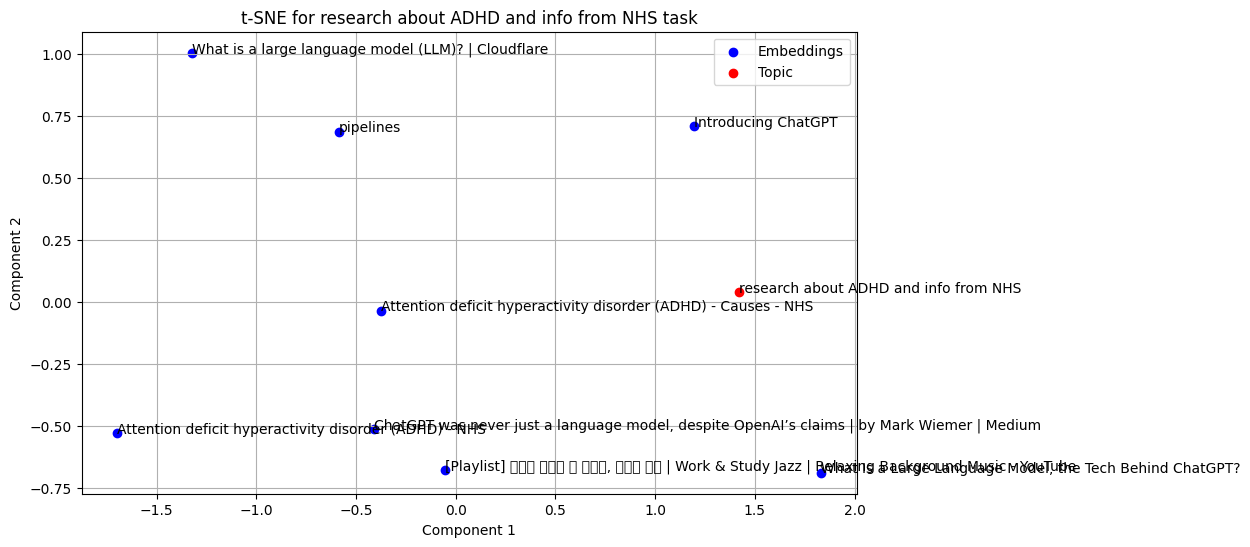

In [7]:
# draw the plot for the 2D array and the topic, topic use different color
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in array_2d], [x[1] for x in array_2d], c='b', label='Embeddings')
plt.scatter([x[0] for x in topic_2d], [x[1] for x in topic_2d], c='r', label='Topic')

# Add titles as annotations for embeddings
for i, t in enumerate(title):
    plt.annotate(t, (array_2d[i][0], array_2d[i][1]))

# Add task topics as annotations for the input array
for i, t in enumerate(topic):
    plt.annotate(t, (topic_2d[i][0], topic_2d[i][1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE for research about ADHD and info from NHS task')
plt.legend()
plt.grid(True)

    

In [8]:
array_2d = [[1.7132563276192596, 0.33358845119837277],
            [-0.8644060257860166, 0.49151961130846555],
            [1.1169584192014175, 1.0340400391490248],
            [0.8117459850660116, -0.03283077831144257],
            [1.474600662407197, -1.1075863231123653],
            [-1.05418850520586, -0.2204131440587115],
            [-1.4982844509409612, -0.1120667598948509],
            [-0.1297791755807609, 0.188543005424927]
            ]

topic_2d = [[-0.05556300721513484, -0.6769316576671516]]

topic = ['Large Language model and ChatGPT']

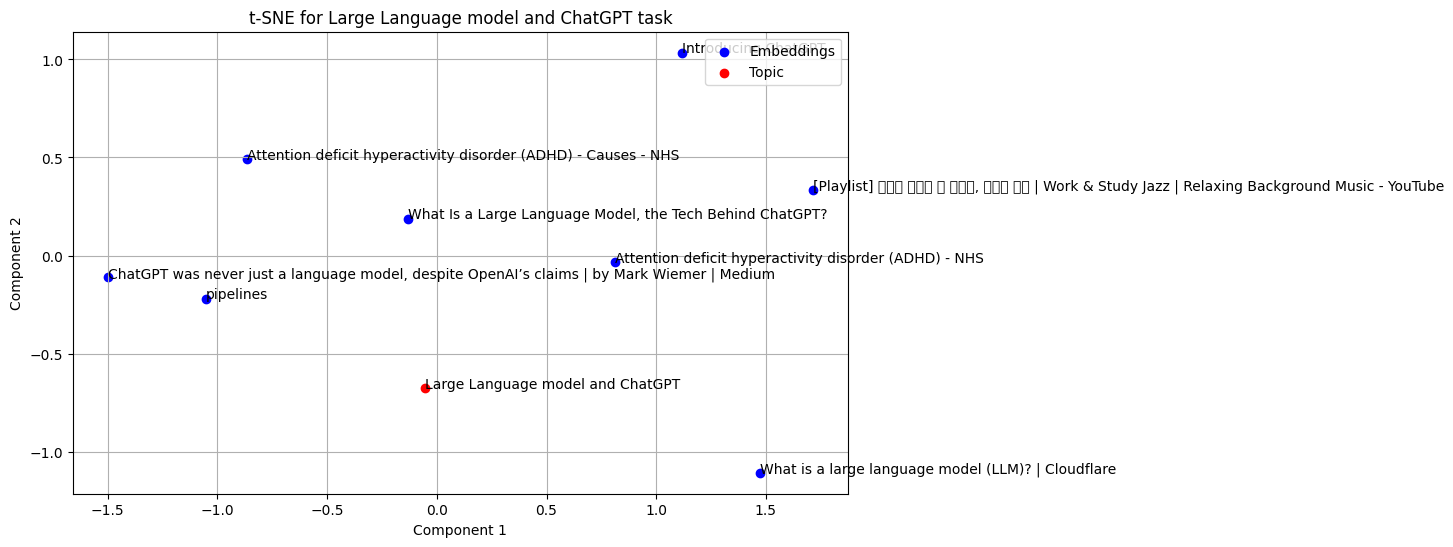

In [9]:
# draw the plot for the 2D array and the topic, topic use different color
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in array_2d], [x[1] for x in array_2d], c='b', label='Embeddings')
plt.scatter([x[0] for x in topic_2d], [x[1] for x in topic_2d], c='r', label='Topic')

# Add titles as annotations for embeddings
for i, t in enumerate(title):
    plt.annotate(t, (array_2d[i][0], array_2d[i][1]))

# Add task topics as annotations for the input array
for i, t in enumerate(topic):
    plt.annotate(t, (topic_2d[i][0], topic_2d[i][1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE for Large Language model and ChatGPT task')
plt.legend()
plt.grid(True)

    

In [38]:
import json

json_file_path = '/Users/macbook/Downloads/taskMap.json'

with open(json_file_path, 'r') as file:
    json_data = json.load(file)

floating_node_data = data.get('task2', {})

node2 = floating_node_data.get('topic_embedding', {})
#pageData = node2.get('pageData', {})
embedding = list(floating_node_data.get('topic_embedding', {}).values())


print(embedding)

[0.034050047397613525, -0.018687710165977478, 0.05767037719488144, -0.03847811743617058, 0.006235154345631599, 0.04303961247205734, -0.005333716981112957, 0.033986423164606094, 0.01408917736262083, -0.0009764228016138077, 0.04109619930386543, -0.001384980627335608, -0.027857650071382523, 0.02893347479403019, 0.026429729536175728, 0.03237515315413475, 0.023831209167838097, 0.011851169168949127, -0.09022104740142822, -0.1289454847574234, 0.039906181395053864, 0.06728103756904602, -0.03538178279995918, -0.019210420548915863, -0.021390680223703384, 0.02002858556807041, -0.02445164881646633, -0.036231961101293564, 0.0629861056804657, -0.010902720503509045, 0.005488050170242786, 0.040185362100601196, 0.04226269572973251, 0.08061898499727249, 0.000528950069565326, 0.050828635692596436, -0.04222586005926132, -0.02418796718120575, 0.009002367965877056, 0.0005319348420016468, -0.02125697396695614, 0.008249341510236263, 0.012201566249132156, 0.002140931785106659, 0.15271492302417755, -0.067672036

In [70]:
import numpy as np

embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input = input_data['Embedding'].values
input_array = [np.array(eval(vector)) for vector in input]
task_topics = input_data['task topic'].values

print(PC_arrays)
print(input_array)


[array([-1.32460654e-01, -3.27481851e-02,  6.76513910e-02,  2.33060513e-02,
       -9.76604410e-03,  1.38947209e-02,  4.27595936e-02,  4.28584106e-02,
       -5.70079358e-03, -8.21156800e-02, -2.81781778e-02,  2.81208046e-02,
       -1.52640324e-02,  4.43243198e-02, -2.37365090e-03,  6.86733946e-02,
        4.54596952e-02,  4.57802340e-02, -6.35189563e-02, -8.91488418e-02,
        1.10756829e-01,  1.03139035e-01,  1.05605461e-02, -3.42068039e-02,
        3.36810499e-02, -6.14370778e-03, -4.65423279e-02, -4.79453728e-02,
        8.29528272e-02,  5.78783639e-02,  3.82546484e-02,  1.22723207e-02,
       -1.45326136e-02,  1.44641981e-01, -1.27274552e-02,  3.17938440e-02,
       -6.78251758e-02,  2.75236950e-03,  7.18326913e-03, -3.05486266e-02,
       -3.63657549e-02, -9.53509356e-04, -5.62273078e-02, -1.60131715e-02,
        6.78685680e-02, -1.78076625e-02, -6.37892634e-02, -4.00638282e-02,
        2.14054752e-02, -5.93590364e-03, -5.92124388e-02,  6.67610765e-03,
        2.57598516e-03, 

In [74]:
task = input_array[1]
distances = []
for q in PC_arrays:
    distance = np.linalg.norm(task - q)
    distances.append(distance)

print(distances)

[1.1006037979982868, 1.094498510192213, 1.428408161416266, 1.3921080484555153, 1.4050330847719148, 1.3895944052108562, 0.9351674980959181, 0.9375671434390772, 0.9522069363762473]


In [ ]:
task2=[1.1006037979982868, 1.094498510192213, 1.428408161416266, 1.3921080484555153, 1.4050330847719148, 1.3895944052108562, 0.9351674980959181, 0.9375671434390772, 0.9522069363762473]

In [ ]:
import json

json_file_path = '/Users/macbook/Downloads/taskMap.json'

with open(json_file_path, 'r') as file:
    json_data = json.load(file)

floating_node_data = data.get('task2', {})

node2 = floating_node_data.get('topic_embedding', {})
#pageData = node2.get('pageData', {})
embedding = list(floating_node_data.get('topic_embedding', {}).values())


print(embedding)

[0.034050047397613525, -0.018687710165977478, 0.05767037719488144, -0.03847811743617058, 0.006235154345631599, 0.04303961247205734, -0.005333716981112957, 0.033986423164606094, 0.01408917736262083, -0.0009764228016138077, 0.04109619930386543, -0.001384980627335608, -0.027857650071382523, 0.02893347479403019, 0.026429729536175728, 0.03237515315413475, 0.023831209167838097, 0.011851169168949127, -0.09022104740142822, -0.1289454847574234, 0.039906181395053864, 0.06728103756904602, -0.03538178279995918, -0.019210420548915863, -0.021390680223703384, 0.02002858556807041, -0.02445164881646633, -0.036231961101293564, 0.0629861056804657, -0.010902720503509045, 0.005488050170242786, 0.040185362100601196, 0.04226269572973251, 0.08061898499727249, 0.000528950069565326, 0.050828635692596436, -0.04222586005926132, -0.02418796718120575, 0.009002367965877056, 0.0005319348420016468, -0.02125697396695614, 0.008249341510236263, 0.012201566249132156, 0.002140931785106659, 0.15271492302417755, -0.067672036

In [ ]:
task1 = [1.4200194485762758, 1.3905214259767926, 1.2622184098882094, 0.9922540403013764, 0.9757747998871314, 1.002036414770154, 1.418241563505464, 1.38818631373721, 1.4194876793468714]

In [77]:
!pip install adjustText

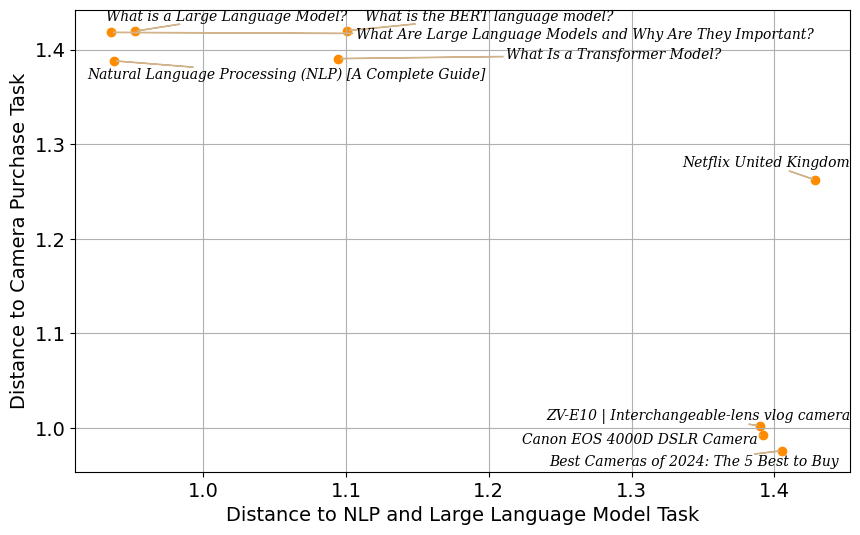

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text 

# Sample data loading
data = {
    'Webpage': [
        'What is the BERT language model?', 'What Is a Transformer Model?', 'Netflix United Kingdom',
        'Canon EOS 4000D DSLR Camera', 'Best Cameras of 2024: The 5 Best to Buy', 'ZV-E10 | Interchangeable-lens vlog camera',
        'What Are Large Language Models and Why Are They Important?', 'Natural Language Processing (NLP) [A Complete Guide]',
        'What is a Large Language Model?'
    ],
    'camera purchase': [1.420019449, 1.390521426, 1.26221841, 0.99225404, 0.9757748, 1.002036415, 1.418241564, 1.388186314, 1.419487679],
    'NLP and Large language model': [1.100603798, 1.09449851, 1.428408161, 1.392108048, 1.405033085, 1.389594405, 0.935167498, 0.937567143, 0.952206936]
}

df = pd.DataFrame(data)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
texts = []
for i, txt in enumerate(df['Webpage']):
    plt.scatter(df['NLP and Large language model'][i], df['camera purchase'][i], color='darkorange')  # Added color for distinction
    texts.append(plt.text(df['NLP and Large language model'][i], df['camera purchase'][i], txt,fontsize=10, fontstyle='italic', family='serif'))

plt.xlabel('Distance to NLP and Large Language Model Task')
plt.ylabel('Distance to Camera Purchase Task')
plt.title('')
plt.grid(True)

# Use adjust_text to automatically adjust the text
adjust_text(texts, arrowprops=dict(color='tan'))

plt.show()

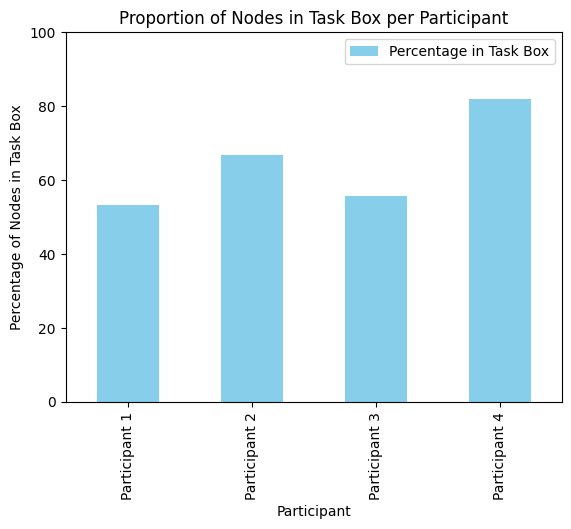

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    "Participant": ["Participant 1", "Participant 2", "Participant 3", "Participant 4"],
    "Total Nodes Created": [15, 9, 18, 11],
    "Nodes in Task Box": [8, 6, 10, 9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate percentage of Nodes in Task Box
df['Percentage in Task Box'] = (df['Nodes in Task Box'] / df['Total Nodes Created']) * 100

# Plotting
fig, ax = plt.subplots()
df.plot(kind='bar', x='Participant', y='Percentage in Task Box', ax=ax, color='skyblue')
ax.set_ylabel('Percentage of Nodes in Task Box')
ax.set_ylim(0, 100)  # Set y-axis to show 0 to 100%
plt.title('Proportion of Nodes in Task Box per Participant')
plt.show()